# SWMAL Exercise


## Gradient Descent Methods and Training


$$

    \providecommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \providecommand\eq[2]{#1 &=& #2\\}
    \providecommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \providecommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \providecommand\st[1]{_{\textrm{\scriptsize #1}}}
    \providecommand\norm[1]{{\cal L}_{#1}}
    \providecommand\obs[2]{#1_{\textrm{\scriptsize obs}}^{\left(#2\right)}}
    \providecommand\diff[1]{\mathrm{d}#1}
    \providecommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\textrm{\scriptsize test}}}
    \def\powtrain{\pown{\textrm{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \providecommand\pfrac[2]{\frac{\partial~#1}{\partial~#2}}
    \providecommand\dfrac[2]{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
    
$$

### Qa The Gradient Descent Method (GD)

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. Which means it is an iterative optimization algorithm used to find the minimum of a function. The function used in this case is the cost function `J(w)`. The idea is based on taking steps proportional to the negative of the gradient of the function at the current point 

The code below firstly imports all the libraries. Secondly theres is created a new function `GenerateData()` and the function returns 3 values `X, X_b, y`. `GenerateData()` generates random data for a linear regression where `X` represents a matrix of input features and `y` represents the target values. And atlast we have the `X_b` and it is the augmented feature matrix with the bias term. 

The `eta` is the learning rate, which is the steps the algorithm  takes towards finding the minimum of the cost function. If `eta` is too large, the algorithm may overshoot the minimum, which can potentially causing it to keep bouncing around near the minimum without settling down or it never reach a stable minimum and keeps running indefinitely. Conversely, if `eta` is too small, the algorithm may take a very long time to it never reach a stable minimum and keeps running indefinitely or get stuck in a local minimum.

The `n_iterations` is the number of epochs also called iterations. 
The `m` is the number of samples
The `theta` is the intial random initializtaion

Inside the forloop we calculate the compute gradients of MSE with respect to theta and then we update the using the gradients and learning rate. This is repeated for the number of iterations. 

See the pictures below on the left the learning rate is too low, and will eventually reach the solution, however it takes a long time. The middle the learning rate is looks pretty good, because we can see in a few iterations it has already found a good solution. On the rigth the learning rate is too high, which mean the algorithm diverges. The algorithm is getting further and futher away from the solution. 

stochastic gradient descent theta=[4.20831857 2.79226572]


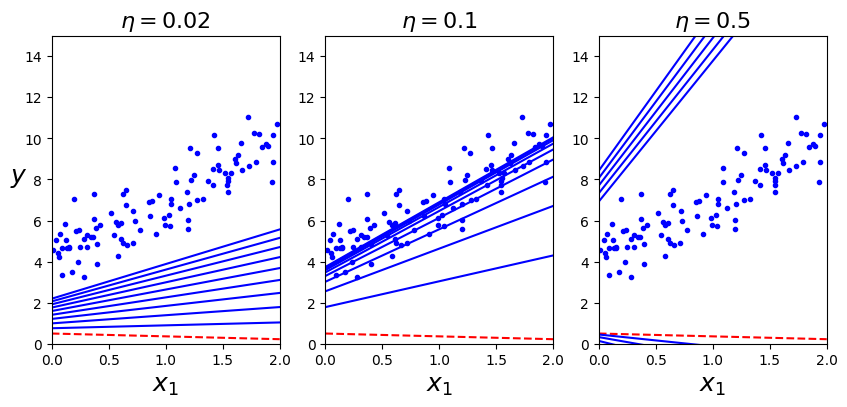

OK


In [2]:

# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def GenerateData():
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    #X_b represents a matrix of input features
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    return X, X_b, y

X, X_b, y = GenerateData()

eta = 0.1 # learning rate
n_iterations = 1000 #num of epochs/iterations
m = 100 # num of samples
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    # Compute gradients of MSE with respect to theta
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    # Update theta using the gradients and learning rate

    theta = theta - eta * gradients

print(f'stochastic gradient descent theta={theta.ravel()}')

##########################################################
# rest of the code is just for plotting, needs no review

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta_path_bgd = []
theta = np.random.randn(2,1)  # random initialization

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

print('OK')

### Qb The Stochastic Gradient Descent Method (SGD)

Stochastic Gradient Descent is a variant of the Gradient Descaent. The main problem with the Gradient Descent is it uses the whole training set and it is really slow. Wheras the SGD is the opposite. SGD takes a random instance in the training set at every step and computes the gradient based only on the single instance. The problem with the SGD will over time be very closed to the minimum, however will continue to bounce around and never settle down. 

The `np.random.randint(m)` generate a random integer between `[0;m)`. In the context `m` is the total number of data points in the traning set.

The main differens in the code is the extra forloop in the SGD compared to the GD. This extra forloop iteraters over all elements in the `X_b`. Another distinction lies in how the gradients are calculated. In GD, they are divided by m. These two reasons are connected since in SGD, we compute gradients each time we go through the for loop.

The `theta` is calculated the same way, however the gradint is changed

```python
for epoch in range(n_epochs):
    for i in range(m):
        .
        .
        .
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = ...
        theta = ...
```
where it for the GD method was just
```python
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = ..
```

stochastic gradient descent theta=[4.24042206 2.81339809]
Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_=[4.16599768], sgd_reg.coef_=[2.76090213]


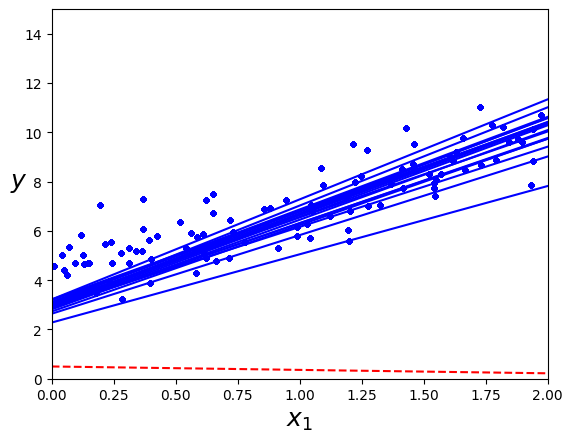

OK


In [3]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta) 
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

        plt.plot(X, y, "b.")      

from sklearn.linear_model import SGDRegressor
#sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
print(f'stochastic gradient descent theta={theta.ravel()}')
print(f'Scikit-learn SGDRegressor "thetas": sgd_reg.intercept_={sgd_reg.intercept_}, sgd_reg.coef_={sgd_reg.coef_}')

##########################################################
# rest of the code is just for plotting, needs no review 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

plt.show()        

print('OK')

### Qc Adaptive learning rate for $\eta$  

The `learning_schedule()` functions is a part of the SGD which takes one parameter as input. It is an adaptive learning rate and it defines how the learning rate
($\eta$). The objective of the learning rate is to start and later reduce the step side. This is done to escape local minimums and later on settle in the global mininmum. The input `t` is the current iteration number. The `t0` is the initial learning rate, which is the larger initital step. The `t1` is determeíne how fast the learning rate decreases. A smaller value make the learning rate decrease more slowly over time. 

Another thing you can do with the `SGDRegressor` is set the learning rate to constant or adative in the hyperparameter. 

```python
SGDRegressor(max_iter=1,
             eta0=0.0005,
             learning_rate="constant", # or 'adaptive' etc.
             random_state=42)
```

### Qd Mini-batch Gradient Descent Method 

The mini-batch gradient descent combines the best aspects of SGD and GD. The mini batch will start with taking random numbes as the SGD and escape from local minima. When the mini-batch is near the global mimimums, it will use the GD method, which is taking steps proportional to the negative of the gradient of the function at the current point 

The main advantage of mini batch GD over the SGD you get a preformce boost from the optimization of matrix operations. 

The main different is the MGD iterates tough the data in a mini-batches of 20 data at the time, whereas the GD proceses the entire dataset at once and the SGD is only processes one data point at a time. The gradients computation is now devided by the size of the minibatch. From the SGD we introduce the learning rate and it helps to decreases the learning rate as the number of iterations increases. The `theta_path_mgd` appends the each `theta` from each training.

In [4]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb
import numpy as np
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(f'mini-batch theta={theta.ravel()}')
print('OK')

mini-batch theta=[4.23219116 2.82565088]
OK


### Qe Choosing a Gradient Descent Method

GD is good to get to the minimum, however it can be stuck in local minimum (if they occur). In the pictures below there is at lot of blue computation, which is expensive in a large datasets.

SGD is fast to convergence due to the frequent parameter update and is good for large datasets as it only processes one data point at a time. The problem with the SGD is willl over time be very close to the minimum, however will continues bounce around and never settel down. 

MGD as is a compromise between GD and SGD. The only bad thing about is it requires tuning of batch size as a hyperparameter. The picture below illustate a good use of the MGD

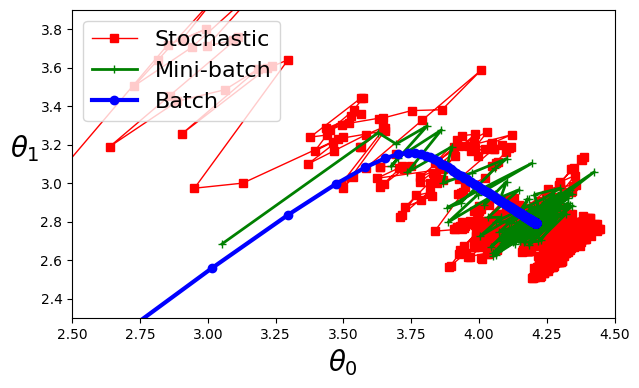

OK


In [5]:
# NOTE: code from [GITHOML], 04_training_linear_models.ipynb

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
print('OK')